# Importing Library

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from sklearn import tree

# Loading Data

In [2]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

# Understanding Data

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [6]:
for i in df:
    print("The data type of {} is {} and it  contains {} unique value ".format(i,df.dtypes[i],df[i].nunique()))
    print(end="\n\n")
    
    #1: The data type of history is in float but it has to be in object as it contains only 2 unique values.
    #2: Loan_ID is of no use as it is different from each row , so it will not make any impact on the target variable

The data type of Loan_ID is object and it  contains 614 unique value 


The data type of Gender is object and it  contains 2 unique value 


The data type of Married is object and it  contains 2 unique value 


The data type of Dependents is object and it  contains 4 unique value 


The data type of Education is object and it  contains 2 unique value 


The data type of Self_Employed is object and it  contains 2 unique value 


The data type of ApplicantIncome is int64 and it  contains 505 unique value 


The data type of CoapplicantIncome is float64 and it  contains 287 unique value 


The data type of LoanAmount is float64 and it  contains 203 unique value 


The data type of Loan_Amount_Term is float64 and it  contains 10 unique value 


The data type of Credit_History is float64 and it  contains 2 unique value 


The data type of Property_Area is object and it  contains 3 unique value 


The data type of Loan_Status is object and it  contains 2 unique value 




In [7]:
#Changing data type of credit history
df["Credit_History"] = df["Credit_History"].astype("object")

In [8]:
#Removing Loan_id as it is not important
df.drop("Loan_ID",axis=1,inplace=True)

In [9]:
#Checking null values in the dataset
display(df.isna().any(),df.isnull().sum())
print(round(sum(df.isnull().sum())/len(df)*100,2),"percentage are null in the dataset")

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

24.27 percentage are null in the dataset


In [10]:
#Removing the null values
for i in df:
    if(df[i].isna().any()==True):
        if(df.dtypes[i]=="object"):
            df[i]=df[i].fillna(df[i].mode()[0])
        else:
            if(df[i].skew()>1 or df[i].skew()<1):
                df[i]=df[i].fillna(df[i].median())
            else:
                df[i]=df[i].fillna(df[i].mean())
    else:
        df[i]=df[i]    

In [11]:
#Null values are removed
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

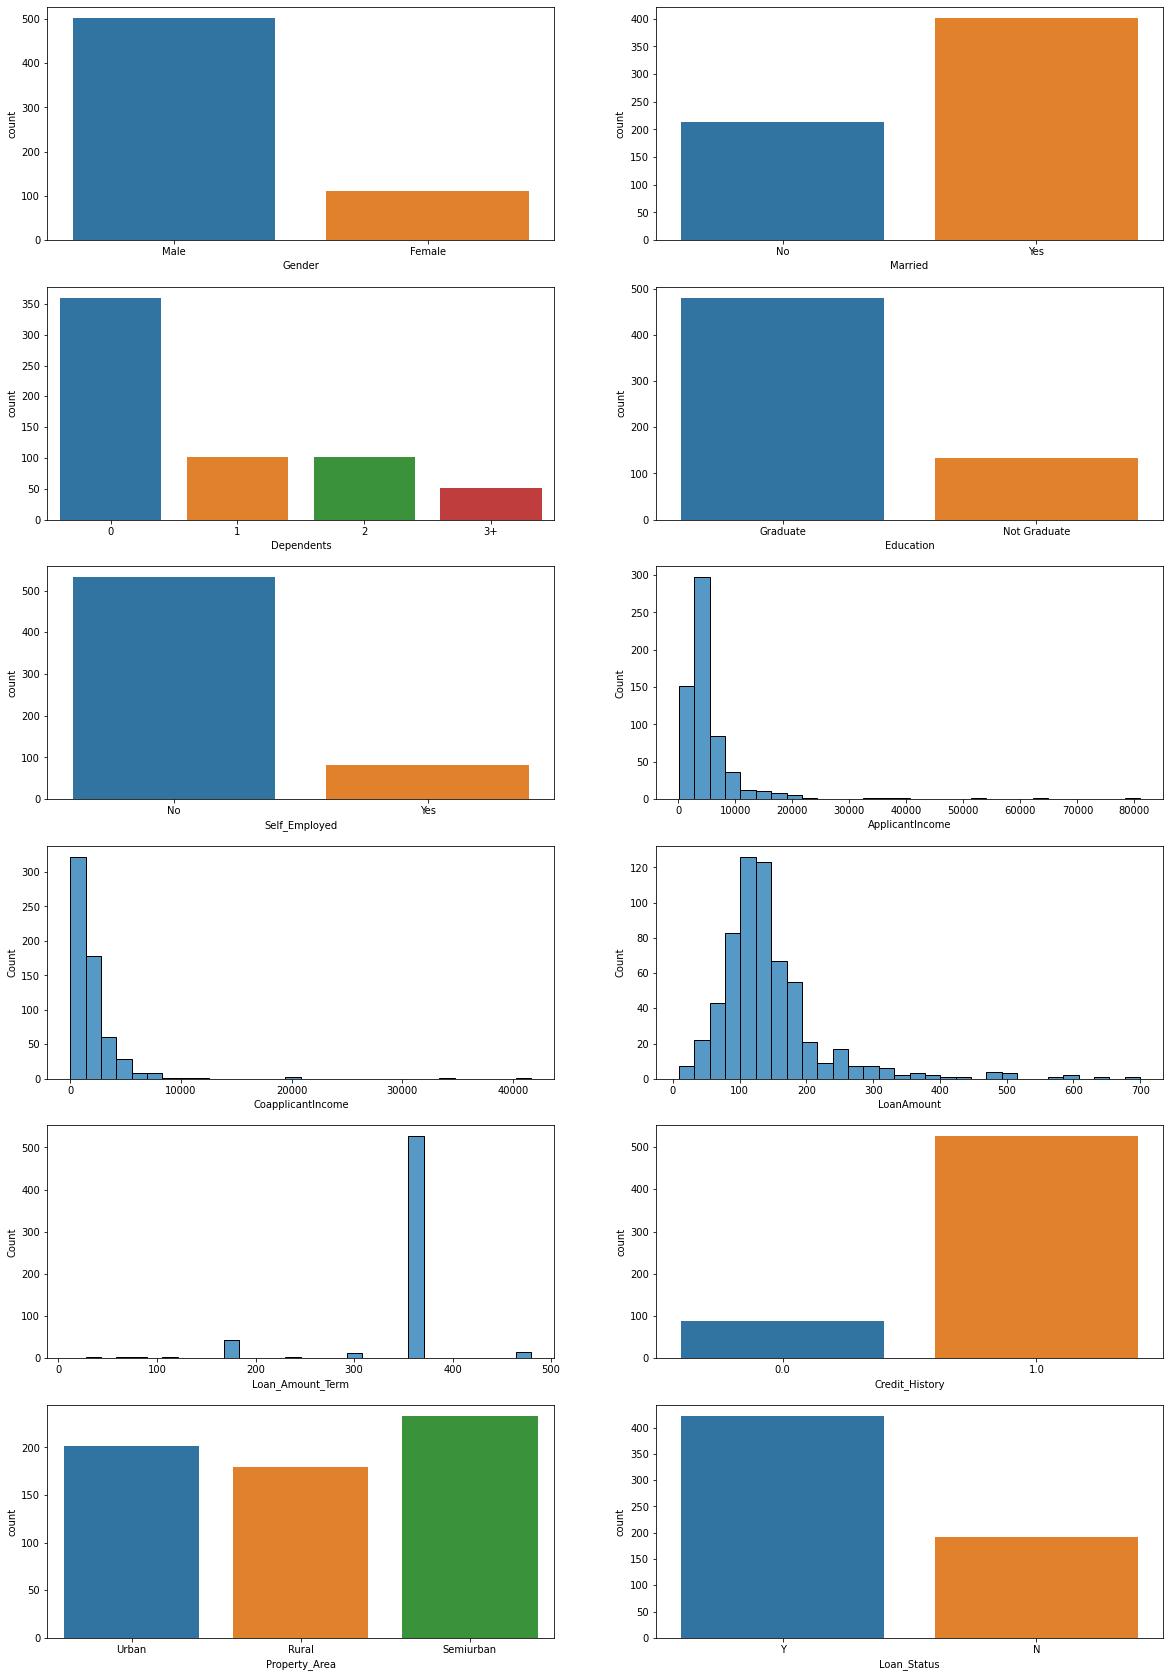

In [15]:
#Univirate Analysis
j = 1
plt.figure(figsize=(20,30))
for i in df:
    if(df[i].nunique()<10):
        plt.subplot(6,2,j)
        sns.countplot(data=df,x=i)
        j = j + 1
    else:
        plt.subplot(6,2,j)
        sns.histplot(data=df,x=i,bins=30)
        j=j+1
plt.show()     

# Bivariate Analysis

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

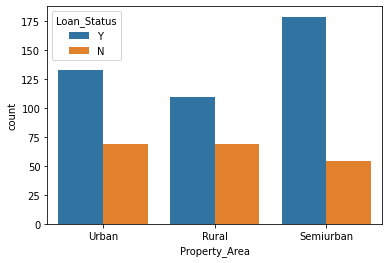

In [17]:
sns.countplot(data=df,x="Property_Area",hue="Loan_Status")

#Chances of granting loan in semiurban area is less than as compared to other two areas.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

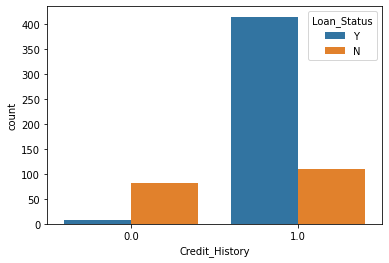

In [19]:
sns.countplot(data=df,x="Credit_History",hue="Loan_Status")

#There are very less chances of gtting loan without credit history

<AxesSubplot:xlabel='Gender', ylabel='count'>

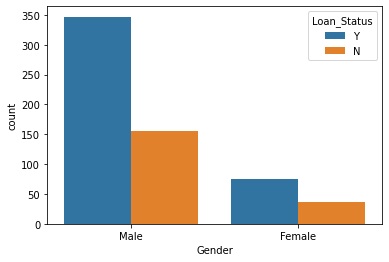

In [21]:
sns.countplot(data=df,x="Gender",hue="Loan_Status")

#Majority of male are getting loan

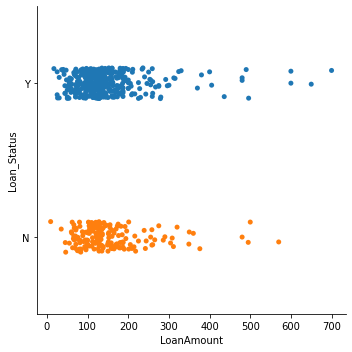

In [22]:
sns.catplot(data=df,x="LoanAmount",y="Loan_Status")

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

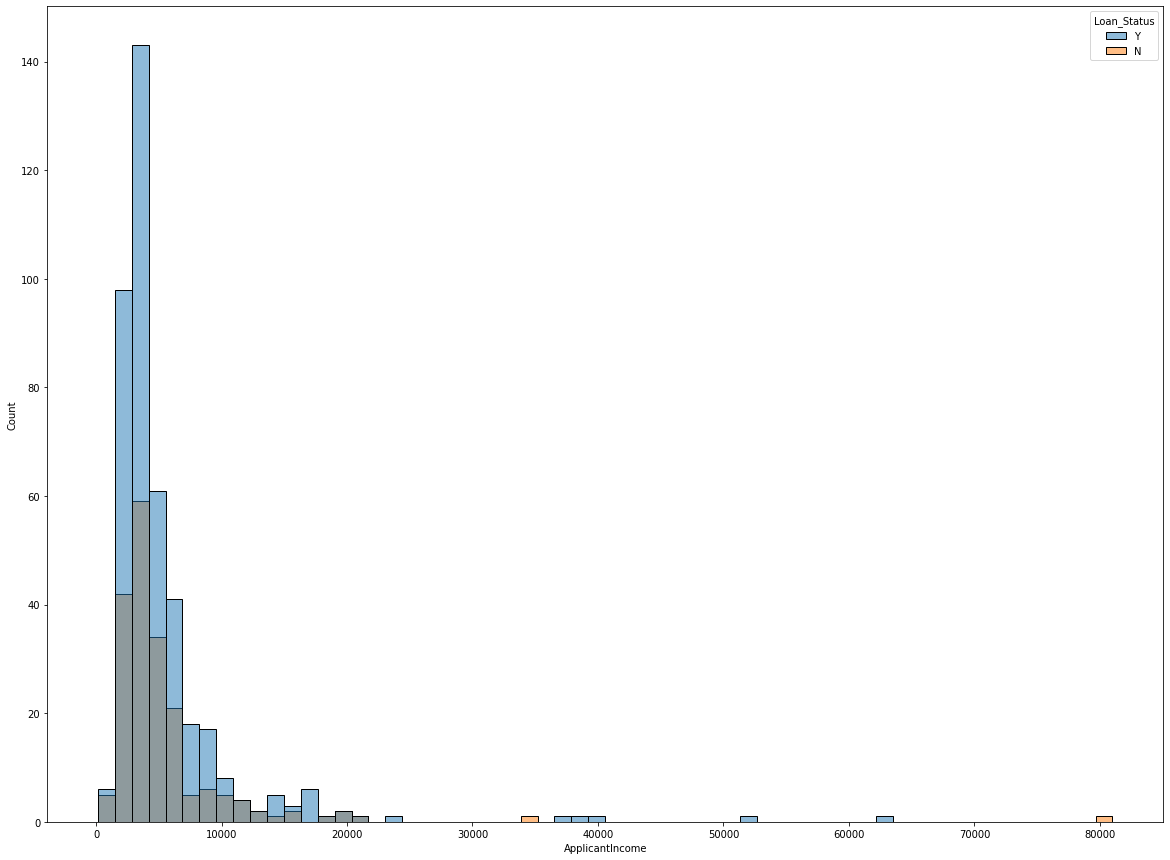

In [25]:
plt.figure(figsize=(20,15))
sns.histplot(data=df,x="ApplicantIncome",hue="Loan_Status",bins=60)

In [29]:
# We will do LabelEncoding on the variable which have a data type object.

for i in df:
    if(df.dtypes[i]=="object"):
        df[i]=le.fit_transform(df[i])
    else:
        df[i]=df[i]

In [30]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


<AxesSubplot:>

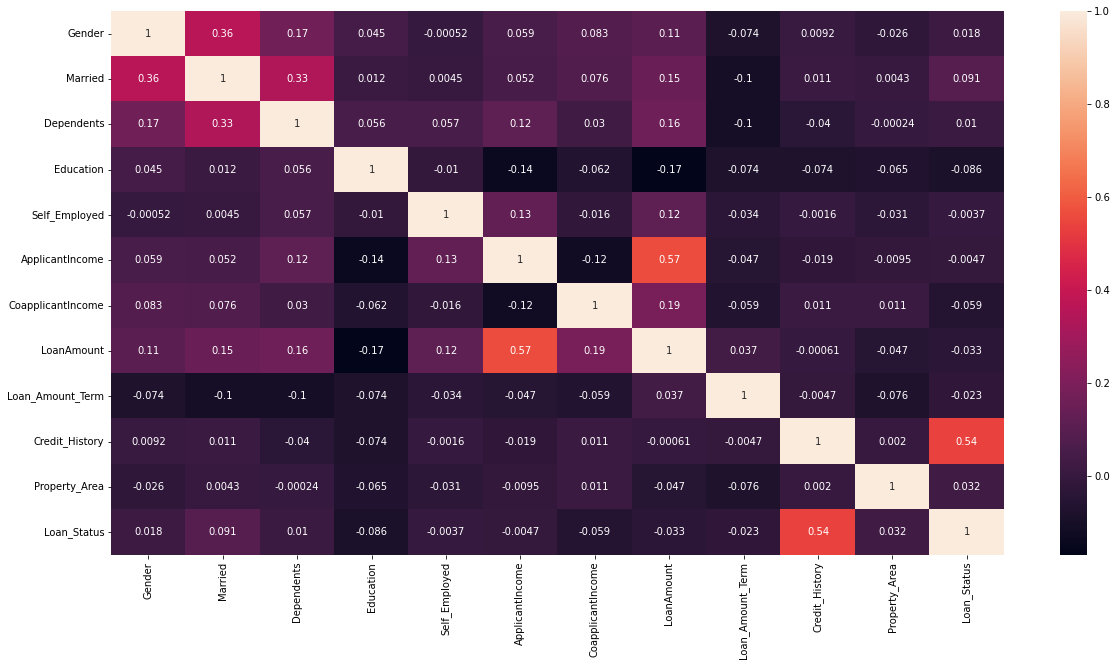

In [32]:
#Checking correltaion between features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

#1: There are no Multicorrelation between feautres
#2: Credit history is having much higher effect as compared to other independent variable

# Train Test Split

In [33]:
y = df["Loan_Status"]
x = df.drop("Loan_Status",axis=1)
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

Gender


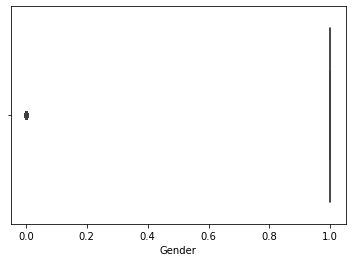

Married


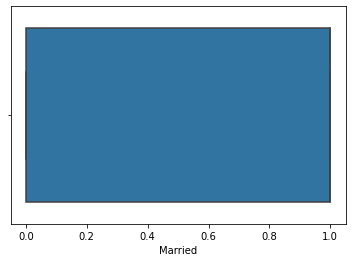

Dependents


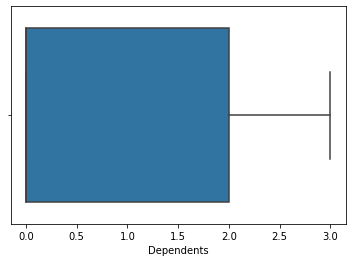

Education


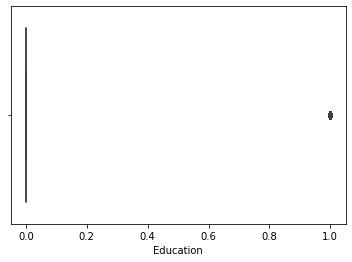

Self_Employed


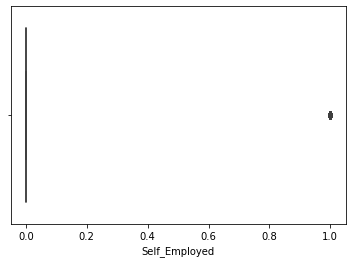

ApplicantIncome


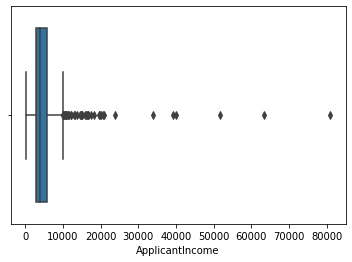

CoapplicantIncome


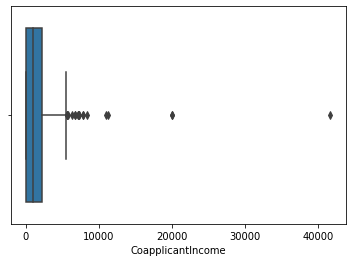

LoanAmount


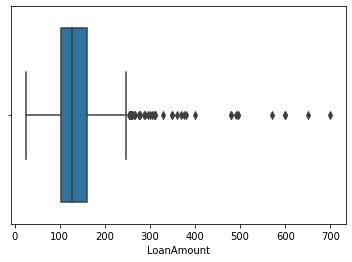

Loan_Amount_Term


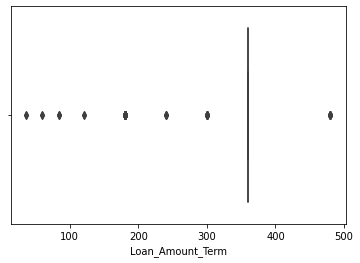

Credit_History


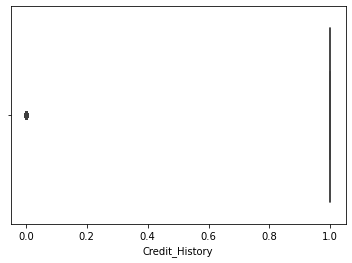

Property_Area


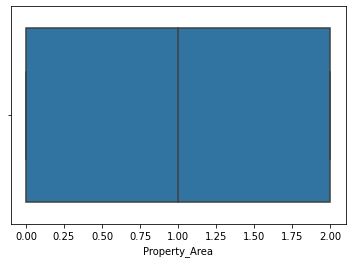

In [34]:
# checkig outliers in train data 
for i in x_train:
    print(i)
    sns.boxplot(data=x_train,x=i)
    plt.show()
## Inference-
    #LoanAmount ,CoapplicantIncome adn ApplicantIncome contain outliers

In [38]:
# Finding IQR  , upper limit and lower limit of the columns which contain outlier 

outliers = ["LoanAmount","CoapplicantIncome","ApplicantIncome"]
IQR_of_outliers = []
upper_limit_outlier = []
lower_limit_outlier = []

for i in outliers:
    Q1 = np.percentile(x_train[i],25)
    Q3 = np.percentile(x_train[i],75)
    IQR = Q3-Q1
    print("The IQR of",i,"is",IQR)
    IQR_of_outliers.append(IQR)
    
    upper_limit = Q3+ 1.5*IQR
    print("The upper limit of",i,"is",upper_limit)
    upper_limit_outlier.append(upper_limit)
    
    lower_limit = Q1 - 1.5*IQR
    print("The lower limit of",i,"is",lower_limit)
    lower_limit_outlier.append(lower_limit)

The IQR of LoanAmount is 59.25
The upper limit of LoanAmount is 249.875
The lower limit of LoanAmount is 12.875
The IQR of CoapplicantIncome is 2202.5
The upper limit of CoapplicantIncome is 5506.25
The lower limit of CoapplicantIncome is -3303.75
The IQR of ApplicantIncome is 2826.0
The upper limit of ApplicantIncome is 9993.5
The lower limit of ApplicantIncome is -1310.5


In [44]:
# Removing outlier

for i ,u , l in zip(outliers,upper_limit_outlier,lower_limit_outlier):
    x_train[i] = np.where(x_train[i]>u,u,np.where(x_train[i]<l,l,x_train[i]))

C:\Users\HP User\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP User\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP User\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Gender


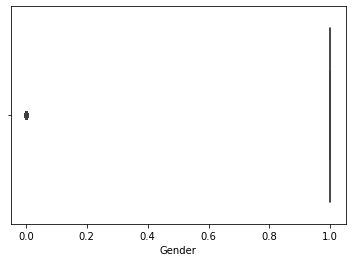

Married


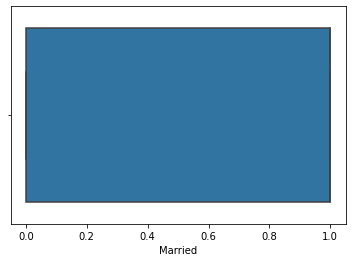

Dependents


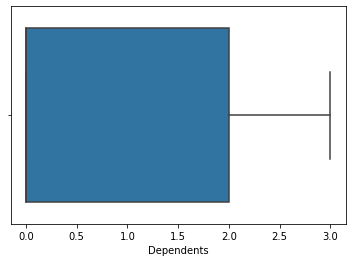

Education


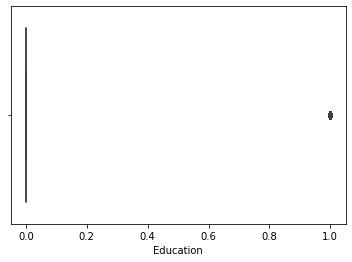

Self_Employed


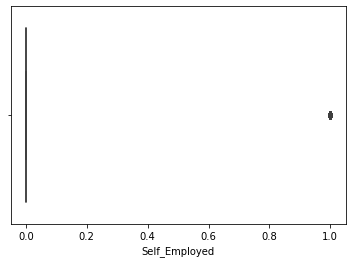

ApplicantIncome


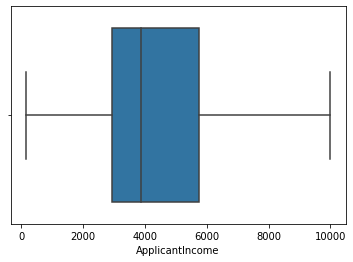

CoapplicantIncome


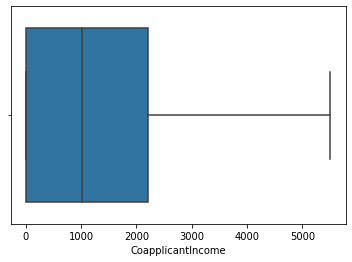

LoanAmount


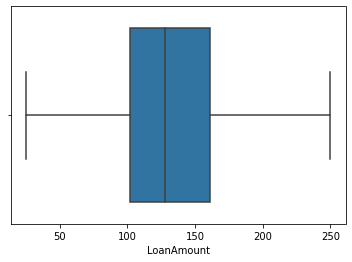

Loan_Amount_Term


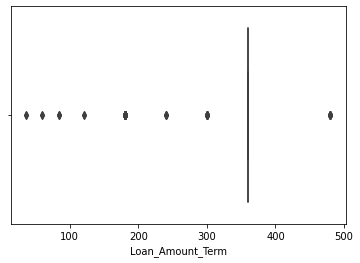

Credit_History


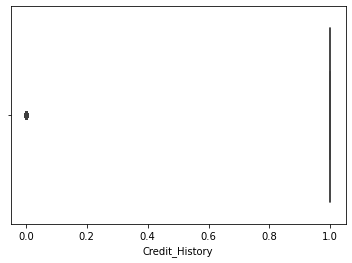

Property_Area


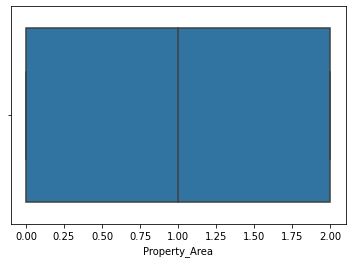

In [45]:
# Checking if outliers are removed from train dataset or not

for i in x_train:
    print(i)
    sns.boxplot(data=x_train,x=i)
    plt.show()

# Logistic Regression

In [46]:
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
lr.predict(x_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [49]:
print("The accuracy through logistic model is",accuracy_score(y_test,lr.predict(x_test)))
print("The precision_score is ",precision_score(y_test,lr.predict(x_test)))
print("The recall score is",recall_score(y_test,lr.predict(x_test)))

The accuracy through logistic model is 0.8441558441558441
The precision_score is  0.84251968503937
The recall score is 0.963963963963964


# Decision Tree

In [50]:
dtc.fit(x_train,y_train)
dtc.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [54]:
print("The accuracy through Decision tree is",accuracy_score(y_test,dtc.predict(x_test)))
print("The precision_score is",precision_score(y_test,dtc.predict(x_test)))
print("The recall_score is",recall_score(y_test,dtc.predict(x_test)))

The accuracy through Decision tree is 0.6948051948051948
The precision_score is 0.8404255319148937
The recall_score is 0.7117117117117117


# Random Forest

In [55]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [56]:
rfc.predict(x_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0])

In [57]:
print("The accuracy through Random forest is",accuracy_score(y_test,rfc.predict(x_test)))
print("The precision_score is ",precision_score(y_test,rfc.predict(x_test)))
print("The recall score is",recall_score(y_test,rfc.predict(x_test)))

The accuracy through Random forest is 0.7987012987012987
The precision_score is  0.8225806451612904
The recall score is 0.918918918918919


# Scaling Using Standard Scaler

In [59]:
ss.fit(x_train)
scaler_x_train = ss.fit_transform(x_train)
scaler_x_test = ss.fit_transform(x_test)

In [60]:
scaler_x_train = pd.DataFrame(scaler_x_train,columns=x_train.columns)
scaler_x_test = pd.DataFrame(scaler_x_test,columns=x_test.columns)

In [61]:
scaler_x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.465759,0.692170,0.206312,-0.533775,-0.409283,0.411030,-0.857242,-1.703072,0.277782,0.416497,1.201865
1,0.465759,-1.444731,-0.772077,-0.533775,-0.409283,-0.739247,0.316020,-0.196570,0.277782,0.416497,-1.316850
2,0.465759,-1.444731,1.184702,-0.533775,-0.409283,0.363238,2.079388,0.464821,0.277782,0.416497,-1.316850
3,-2.147034,-1.444731,-0.772077,-0.533775,-0.409283,0.554406,-0.857242,0.354589,0.277782,0.416497,1.201865
4,-2.147034,-1.444731,-0.772077,-0.533775,-0.409283,-1.156712,0.195345,-1.519353,0.277782,0.416497,1.201865


# Logistic Model on Scaled Value

In [63]:
lr.fit(scaler_x_train,y_train)
lr.predict(scaler_x_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [64]:
print("The accuracy through logestic model is",accuracy_score(y_test,lr.predict(scaler_x_test)))
print("The precision_score is ",precision_score(y_test,lr.predict(scaler_x_test)))
print("The recall score is",recall_score(y_test,lr.predict(scaler_x_test)))

The accuracy through logestic model is 0.8376623376623377
The precision_score is  0.8257575757575758
The recall score is 0.9819819819819819


# Decision Tree Model on Scaled Value

In [66]:
dtc.fit(scaler_x_train,y_train)
dtc.predict(scaler_x_test)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [67]:
print("The accuracy through Decision Tree is",accuracy_score(y_test,dtc.predict(scaler_x_test)))
print("The precision_score is ",precision_score(y_test,dtc.predict(scaler_x_test)))
print("The recall score is",recall_score(y_test,dtc.predict(scaler_x_test)))

The accuracy through Decision Tree is 0.6558441558441559
The precision_score is  0.7959183673469388
The recall score is 0.7027027027027027


# Random Forest Tree Model on Scaled Value

In [68]:
rfc.fit(scaler_x_train,y_train)
rfc.predict(scaler_x_test)

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [69]:
print("The accuracy through Random forest is",accuracy_score(y_test,rfc.predict(scaler_x_test)))
print("The precision_score is ",precision_score(y_test,rfc.predict(scaler_x_test)))
print("The recall score is",recall_score(y_test,rfc.predict(scaler_x_test)))

The accuracy through Random forest is 0.8181818181818182
The precision_score is  0.8267716535433071
The recall score is 0.9459459459459459
